In [1]:
import yfinance as yf # https://github.com/ranaroussi/yfinance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings(action='ignore')

In [2]:
if os.name == 'posix':
    plt.rc('font',family = 'AppleGothic')
else:
    plt.rc('font',family = 'Malgun Gothic')

# Using Lib

In [3]:
stocks = yf.Ticker('AAPL')

In [4]:
df = pd.DataFrame(stocks.history(start='2010-01-01', end='2022-09-23')['Close'])
df

Close
Date                  
2009-12-31    6.426000
2010-01-04    6.526019
2010-01-05    6.537302
2010-01-06    6.433318
2010-01-07    6.421427
...                ...
2022-09-16  150.699997
2022-09-19  154.479996
2022-09-20  156.899994
2022-09-21  153.720001
2022-09-22  152.740005

[3204 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

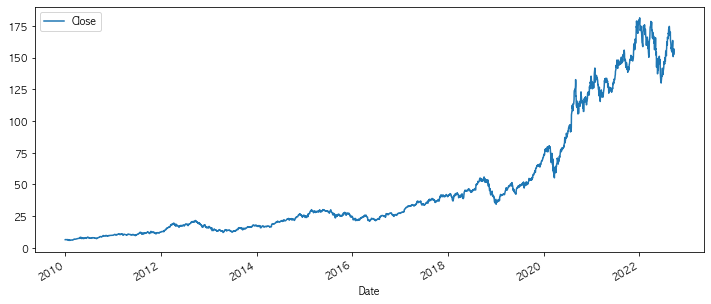

In [5]:
df.plot(figsize = (12, 5))

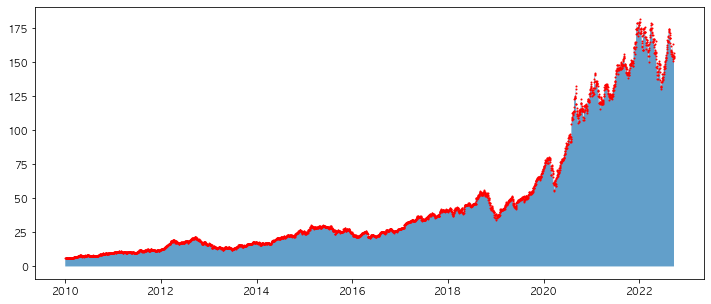

In [6]:
plt.figure(figsize = (12, 5))
plt.fill_between(x= df.index, y1= df['Close'], alpha = 0.7)
plt.scatter(x =df.index, y = df['Close'], color = 'red', s =1)
plt.show()

# 장,단기 추세(trend)

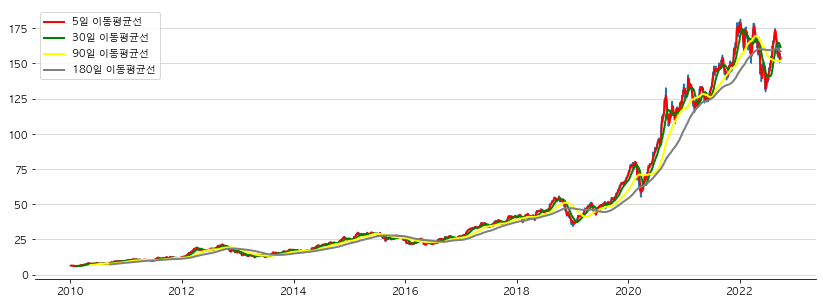

In [42]:
fig, ax = plt.subplots(figsize = (14, 5))

# 필요없는 선 제거
ax.spines[["left", "top", "right"]].set_visible(False)
# y축 선 생성
ax.grid(axis="y", c="lightgray") # "axis = 'x'" 는 x축 세로선 grid생성

ax.plot(df.index, df['Close'])
ax.plot(df.index, df['Close'].rolling(5).mean(), color = 'red',label = '5일 이동평균선',linewidth=2)
ax.plot(df.index, df['Close'].rolling(30).mean(), color = 'green',label = '30일 이동평균선',linewidth=2)
ax.plot(df.index, df['Close'].rolling(90).mean(), color = 'yellow',label = '90일 이동평균선',linewidth=2)
ax.plot(df.index, df['Close'].rolling(180).mean(), color = 'gray',label = '180일 이동평균선',linewidth=2)
plt.legend()
plt.show()

# 시계열 분해를 통한 패턴 탐색

시계열 데이터에는 이렇게 이동평균으로 확인할 수 있는 추세만 있는 것이 아니라 계절성과 잔차라는 요소가 있습니다. 계절성은 관측치(observed, 주가)에서 추세(trend)를 제거하고 남은 데이터 중 반복되는 패턴을 잡아서 보여주며 잔차(residual, resid)는 계절성까지 제거되고 남은 값을 보여줍니다. 따라서 잔차에서는 특정 반복 패턴, 커지거나 작아지는 움직임, 급격히 튀는 구간 등이 남아 있으면 안 됩니다. 모든 패턴과 움직임이 추출되고 남은 '나머지'는 random, 즉 무작위적 변동성이어야 하기 때문입니다. ​

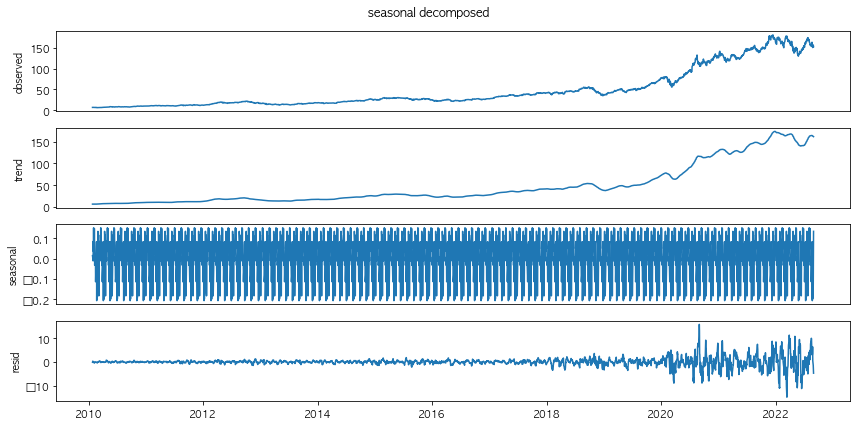

In [50]:

from statsmodels.tsa.seasonal import seasonal_decompose 
res = seasonal_decompose(df ,model = 'addictive',period=30)


plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()

- 추세는 20년이후 크게 상승한것을 알 수 있으며 2020년 이후 무작위성이 높아지고 있음을 보여주고 있다, 즉 어떠한 사건이 있음을 짐작해 볼 수 있다.

In [62]:
df_2022 = df.reset_index()
df_2022 = df_2022[df_2022['Date'].dt.year==2022]
df_2022 = df_2022.set_index('Date')

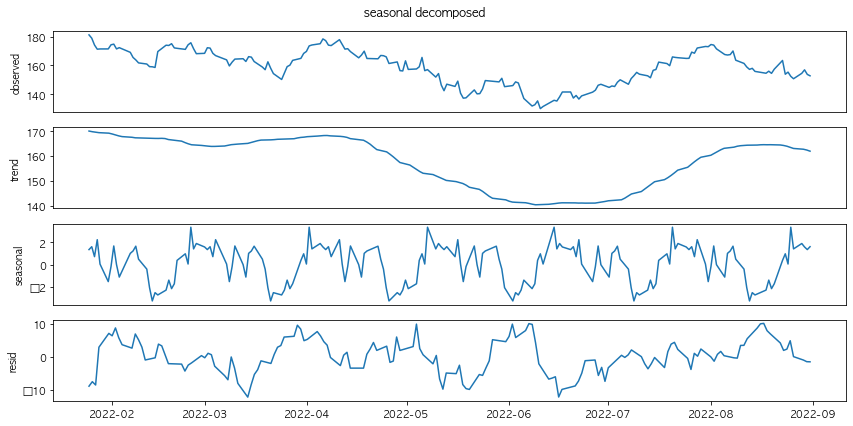

In [65]:
# 2022년 이후 데이터만 분해해봅니다.
res = seasonal_decompose(df_2022['Close'], period=30)

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()